In [62]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [63]:
# Open image using PIL
image = Image.open('bird_small.png')

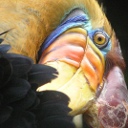

In [64]:
image

In [65]:
image.size

(128, 128)

In [68]:
img_array = np.asarray(image)
img_array.shape

(128, 128, 3)

In [80]:
img_array

array([[[219, 180, 103],
        [230, 185, 116],
        [226, 186, 110],
        ...,
        [ 14,  15,  13],
        [ 13,  15,  12],
        [ 12,  14,  12]],

       [[230, 193, 119],
        [224, 192, 120],
        [226, 192, 124],
        ...,
        [ 16,  16,  13],
        [ 14,  15,  10],
        [ 11,  14,   9]],

       [[228, 191, 123],
        [228, 191, 121],
        [220, 185, 118],
        ...,
        [ 14,  16,  13],
        [ 13,  13,  11],
        [ 11,  15,  10]],

       ...,

       [[ 15,  18,  16],
        [ 18,  21,  18],
        [ 18,  19,  16],
        ...,
        [ 81,  45,  45],
        [ 70,  43,  35],
        [ 72,  51,  43]],

       [[ 16,  17,  17],
        [ 17,  18,  19],
        [ 20,  19,  20],
        ...,
        [ 80,  38,  40],
        [ 68,  39,  40],
        [ 59,  43,  42]],

       [[ 15,  19,  19],
        [ 20,  20,  18],
        [ 18,  19,  17],
        ...,
        [ 65,  43,  39],
        [ 58,  37,  38],
        [ 52,  39,  34]]

In [67]:
# Separate RGB channels
r = img_array[:,:,0]
g = img_array[:,:,1]
b = img_array[:,:,2]

# Combine RGB channels into a feature matrix
features = np.stack([r.flatten(), g.flatten(), b.flatten()], axis=1)

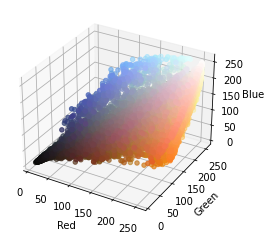

In [85]:
# Plot scatter plot of RGB values
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(features[:,0], features[:,1], features[:,2], c=features/255.0)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

In [51]:
def kmeans(data, k, max_iter=100):
    # Initialize cluster centers randomly
    centers = data[np.random.choice(data.shape[0], size=k, replace=False), :]

    for i in range(max_iter):
        # Assign each data point to the nearest cluster center
        labels = np.argmin(np.linalg.norm(data - centers[:, np.newaxis], axis=2), axis=0)

        # Update cluster centers to be the mean of the data points assigned to them
        centers = np.array([data[labels == j].mean(axis=0) for j in range(k)])

    return centers, labels


In [92]:
# Perform k-means clustering with 16 clusters
k = 16
cluster_centers, labels = kmeans(features, k)

# Convert cluster centers to integer RGB values
cluster_centers = np.round(cluster_centers).astype(int)


In [93]:
# Create a new image using the 16 cluster centers
new_img_array = cluster_centers[labels]
new_img_array = np.reshape(new_img_array, (image.size[1], image.size[0], 3))
new_image = Image.fromarray(np.uint8(new_img_array))
# Save the new image
new_image.save('output.png')

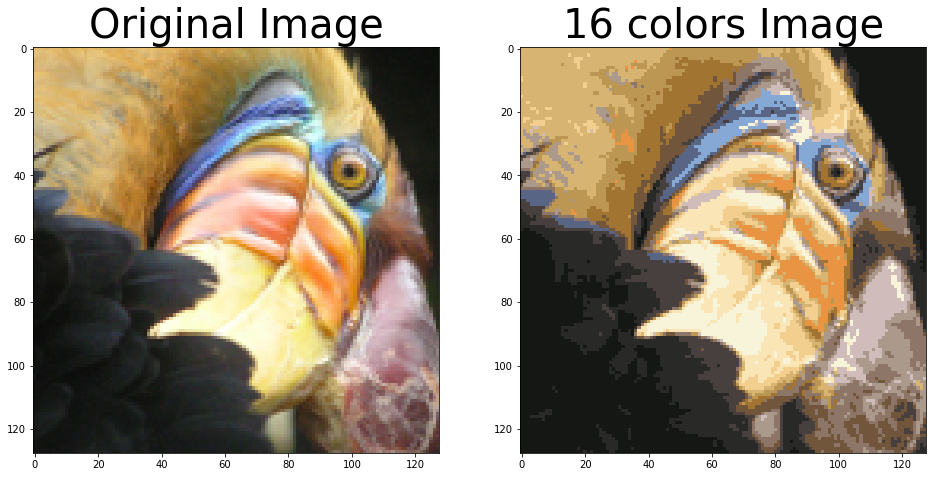

In [94]:
# Display original and clustered image side by side
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(image)
ax[0].set_title('Original Image',size='40')
ax[1].imshow(new_image)
ax[1].set_title(str(k) + ' colors Image', size=40)
plt.show()